In [14]:
import pandas as pd 
import numpy as np 
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
%matplotlib inline

# from library

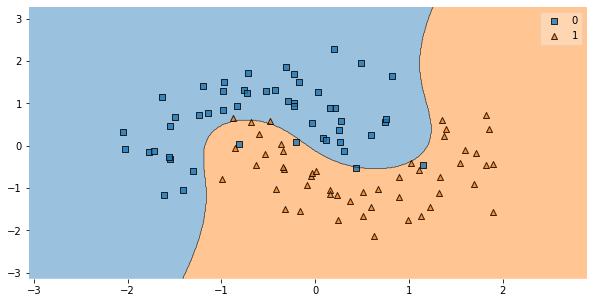

In [16]:
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# loading the data
X, y = make_moons(noise=0.3, random_state=0)

# scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# fit the model with polynomial kernel
svc_clf = SVC(kernel="poly", degree=3, C=5, coef0=1)
svc_clf.fit(X_scaled, y)

# plotting the decision regions
plt.figure(figsize=(10, 5))
plot_decision_regions(X_scaled, y, clf=svc_clf)

plt.show()

In [20]:
from sklearn.datasets import make_blobs 

# generating a dataset
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=23)
def initialize_param(X): 
    """
    Initializing the weight vector and bias
    """
    _, n_features = X.shape
    w = np.zeros(n_features)
    b = 0 
    return w, b
def optimization(X, y, learning_rate=0.001, lambd=0.01, n_iters=1000): 
    """
    finding value of w and b that make the margin as large as possible while
    avoiding violations (Hard margin classification)
    """
    t = np.where(y <= 0, -1, 1)
    w, b = initialize_param(X)
    
    for _ in range(n_iters): 
        for idx, x_i in enumerate(X): 
            condition = t[idx] * (np.dot(x_i, w) + b) >= 1
            if condition: 
                w -= learning_rate * (2 * lambd * w)
            else: 
                w -= learning_rate * (2 * lambd *  w - np.dot(x_i, t[idx]))
                b -= learning_rate * t[idx]
    return w, b
w, b = gradient_descent(X, y)
def predict(X, w, b):
    """
    classify examples
    """
    decision = np.dot(X, w) + b
    return np.sign(decision)
# my implementation visualization
visualize_svm()

# convert X to DataFrame to easily copy code
X = pd.DataFrame(data=X,
                 columns= ["x1", "x2"])

# fit the model with hard margin (Large C parameter)
svc = LinearSVC(loss="hinge", C=1000)
svc.fit(X, y)

# sklearn implementation visualization
plot_svm()

NameError: name 'gradient_descent' is not defined